In [2]:
!pip install scipy
import pandas as pd
import numpy as np
from scipy.stats import norm


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [57]:
import numpy as np
# normal R.V
k = 1
sig = 1
mu = 1
n = 100000

samples = np.random.normal(loc=mu, scale=sig, size=n)
f = np.maximum((np.ones(n) - samples), np.zeros(n))
expBach = np.sum(f) / n #compute E[(k-X)+]

sample_mean = np.mean(f)
sample_std = np.std(f, ddof=1)
z = 1.96

CI = (sample_mean - z * sample_std / np.sqrt(n),
        sample_mean + z * sample_std / np.sqrt(n))


closedForm = (k-mu) * norm.cdf((k-mu)/sig, loc=0, scale=1) + sig * norm.pdf((k-mu)/sig, loc=0, scale=1)

print(f'Simulated Mean: {expBach}')
print(f'I am 95% confident that the true Expectation of E[(k-X)^+] lies between ({CI[0]}, {CI[1]})')
print(f'Closed Form Mean: {closedForm}')



Simulated Mean: 0.4002508080941569
I am 95% confident that the true Expectation of E[(k-X)^+] lies between (0.3966148404560493, 0.40388677573226456)
Closed Form Mean: 0.3989422804014327


In [63]:
import numpy as np
# normal R.V
k = 1
sig = 1
mu = 1
n = 100000

samples = np.random.normal(loc=mu, scale=sig, size=n)
f = np.maximum((np.ones(n) - (np.e * np.ones(n)) ** samples), np.zeros(n))
expBach = np.sum(f) / n #compute E[(k-e^X)+]

sample_mean = np.mean(f)
sample_std = np.std(f, ddof=1)
z = 1.96

CI = (sample_mean - z * sample_std / np.sqrt(n),
        sample_mean + z * sample_std / np.sqrt(n))


closedForm = k * norm.cdf((np.log(k) - mu)/sig, loc=0, scale=1) - (np.e ** (mu + 0.5 * sig ** 2)) * norm.cdf((np.log(k) - mu)/sig - sig)

print(f'Simulated Mean: {expBach}')
print(f'I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between ({CI[0]}, {CI[1]})')
print(f'Closed Form Mean: {closedForm}')

Simulated Mean: 0.05646087020510103
I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between (0.05547660705005973, 0.05744513336014233)
Closed Form Mean: 0.056696236230553546


In [71]:
import numpy as np
# normal R.V
k = 1
sig = 1
mu = 1
n = 100000

samples = np.random.normal(loc=mu, scale=sig, size=n)
f = (np.maximum((np.ones(n) - samples), np.zeros(n)) + np.maximum(samples - np.ones(n), np.zeros(n)))/2
expBach = np.sum(f) / n #compute E[(k-X)+]

sample_mean = np.mean(f)
sample_std = np.std(f, ddof=1)
z = 1.96

CI = (sample_mean - z * sample_std / np.sqrt(n),
        sample_mean + z * sample_std / np.sqrt(n))

closedForm = (k-mu) * norm.cdf((k-mu)/sig, loc=0, scale=1) + sig * norm.pdf((k-mu)/sig, loc=0, scale=1)

print(f'Simulated Mean: {expBach}')
print(f'I am 95% confident that the true Expectation of E[(k-X)^+] lies between ({CI[0]}, {CI[1]})')
print(f'Closed Form Mean: {closedForm}')

Simulated Mean: 0.3977967829886116
I am 95% confident that the true Expectation of E[(k-X)^+] lies between (0.3959305779750542, 0.399662988002169)
Closed Form Mean: 0.3989422804014327


In [76]:
import numpy as np
# normal R.V
k = 1
sig = 1
mu = 1
n = 100000

samples = np.random.normal(loc=mu, scale=sig, size=n)
f = 1/2 * (np.maximum((np.ones(n) - (np.e * np.ones(n)) ** samples), np.zeros(n)) + np.maximum(np.ones(n) - 
                                                    (np.e * np.ones(n)) ** (2 * np.ones(n) - samples), np.zeros(n)) )
expBach = np.sum(f) / n #compute E[(k-e^X)+]

sample_mean = np.mean(f)
sample_std = np.std(f, ddof=1)
z = 1.96

CI = (sample_mean - z * sample_std / np.sqrt(n),
        sample_mean + z * sample_std / np.sqrt(n))


closedForm = k * norm.cdf((np.log(k) - mu)/sig, loc=0, scale=1) - (np.e ** (mu + 0.5 * sig ** 2)) * norm.cdf((np.log(k) - mu)/sig - sig)

print(f'Simulated Mean: {expBach}')
print(f'I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between ({CI[0]}, {CI[1]})')
print(f'Closed Form Mean: {closedForm}')

Simulated Mean: 0.05661523705837227
I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between (0.05596699126279456, 0.057263482853949985)
Closed Form Mean: 0.056696236230553546


In [137]:
import numpy as np
# normal R.V
k = 1
sig = 1
mu = 1
n = 1000000
closedFormP1 = (k-mu) * norm.cdf((k-mu)/sig, loc=0, scale=1) + sig * norm.pdf((k-mu)/sig, loc=0, scale=1)
c = np.arange(-0.5, 0.6, 0.1) # -0.5 to 0.5 with step=0.1
samples = np.random.normal(loc=mu, scale=sig, size=n)
min_std = float('inf')
minC = None
closedForm = k * norm.cdf((np.log(k) - mu)/sig, loc=0, scale=1) - (np.e ** (mu + 0.5 * sig ** 2)) * norm.cdf((np.log(k) - mu)/sig - sig)
print(f'Closed Form Mean: {closedForm}\n')
for mult in c:
        f = np.maximum((np.ones(n) - (np.e * np.ones(n)) ** samples), np.zeros(n)) + \
                                                mult * (np.maximum(np.ones(n) - samples, np.zeros(n)) -  closedFormP1)
        expBach = np.sum(f) / n 
        sample_mean = np.mean(f)
        sample_std = np.std(f, ddof=1)
        
        if sample_std < min_std:
                min_std = sample_std
                minC = mult

        z = 1.96

        CI = (sample_mean - z * sample_std / np.sqrt(n),
                sample_mean + z * sample_std / np.sqrt(n))

        print(f"for c = {mult:.2f}")
        print(f'Simulated Mean: {expBach}')
        print(f'I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between ({CI[0]}, {CI[1]})\n')
print(f'The Optimal Value For c is {minC:.2f}')

Closed Form Mean: 0.056696236230553546

for c = -0.50
Simulated Mean: 0.056564939579468176
I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between (0.0562190576739771, 0.056910821484959254)

for c = -0.40
Simulated Mean: 0.05659706599249852
I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between (0.056346737297931326, 0.05684739468706572)

for c = -0.30
Simulated Mean: 0.05662919240552886
I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between (0.056450494064072355, 0.05680789074698537)

for c = -0.20
Simulated Mean: 0.056661318818559216
I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between (0.05649566792573668, 0.05682696971138175)

for c = -0.10
Simulated Mean: 0.056693445231589576
I am 95% confident that the true Expectation of E[(k-e^X)^+] lies between (0.05647166647137005, 0.0569152239918091)

for c = -0.00
Simulated Mean: 0.05672557164461992
I am 95% confident that the true Expectation of E[(k-e^X)^+] lies 

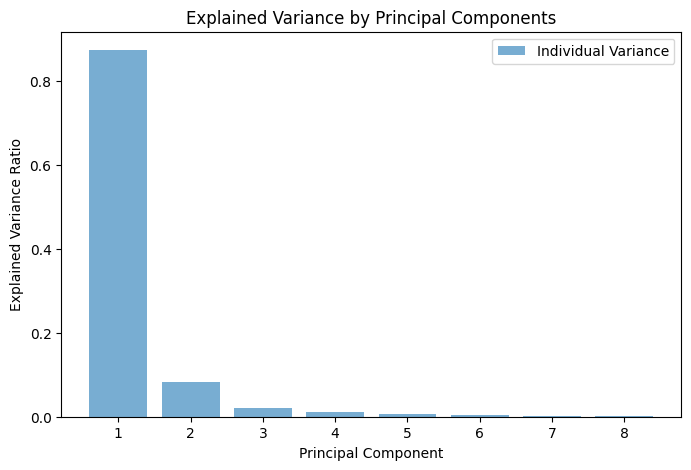

PC1 explains 87.35% of the variance.
PC2 explains 8.25% of the variance.
PC3 explains 2.07% of the variance.
PC4 explains 1.02% of the variance.
PC5 explains 0.54% of the variance.
PC6 explains 0.32% of the variance.
PC7 explains 0.26% of the variance.
PC8 explains 0.21% of the variance.
The first 3 Principle Components hold 0.9766330379137114 of the variance


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('/Users/reubenbillian/cfhw3/PCA_Treasuries.xlsx', sheet_name=1)
df.set_index("Unnamed: 0", inplace=True)
df.index.name = 'Date'
df = df[['1yr', '2yr', '3yr', '5yr', '7yr', '10yr', '20yr', '30yr']]

df_diff = df.diff().dropna() # compute row differences and drop null rows

num_features = min(len(df_diff.columns), len(df_diff))


scalar = StandardScaler()
df_scaled = scalar.fit_transform(df_diff)

pca = PCA(n_components=num_features)
pca.fit(df_diff)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, num_features + 1), explained_variance, alpha=0.6, label="Individual Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.legend()
plt.show()
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i} explains {var:.2%} of the variance.")
print(f'The first 3 Principle Components hold {explained_variance[0] + explained_variance[1] + explained_variance[2]} of the variance')

In [16]:
df_diff.head(10)

,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
Date,,,,,,,,
2010-01-05,-0.04,-0.08,-0.09,-0.09,-0.08,-0.08,-0.06,-0.06
2010-01-06,-0.01,0.00,0.03,0.04,0.05,0.08,0.09,0.11
2010-01-07,0.00,0.02,0.02,0.02,0.00,0.00,-0.01,-0.01
2010-01-08,-0.03,-0.07,-0.06,-0.05,-0.02,-0.02,-0.01,0.01
2010-01-11,-0.02,-0.01,-0.01,0.01,0.01,0.02,0.03,0.04
2010-01-12,-0.01,-0.03,-0.05,-0.09,-0.10,-0.11,-0.12,-0.12
2010-01-13,0.03,0.05,0.04,0.06,0.06,0.06,0.08,0.09
2010-01-14,-0.03,-0.03,-0.05,-0.04,-0.05,-0.04,-0.08,-0.08
2010-01-15,-0.01,-0.05,-0.05,-0.07,-0.06,-0.06,-0.04,-0.05


In [17]:
df_diff.tail(10)

,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
Date,,,,,,,,
2020-06-26,0.00,0.00,-0.02,-0.02,-0.04,-0.04,-0.05,-0.06
2020-06-29,-0.01,-0.01,-0.01,-0.02,-0.02,0.00,0.01,0.02
2020-06-30,0.00,0.00,0.00,0.01,0.02,0.02,0.02,0.02
2020-07-01,0.00,0.01,0.01,0.02,0.03,0.03,0.02,0.02
2020-07-02,0.00,-0.01,0.00,-0.02,-0.02,-0.01,0.00,0.00
2020-07-06,0.00,0.00,0.00,0.02,0.01,0.01,0.01,0.02
2020-07-07,-0.01,0.00,0.00,-0.02,-0.03,-0.04,-0.06,-0.07
2020-07-08,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.01
2020-07-09,0.00,0.00,-0.01,-0.02,-0.03,-0.05,-0.07,-0.07


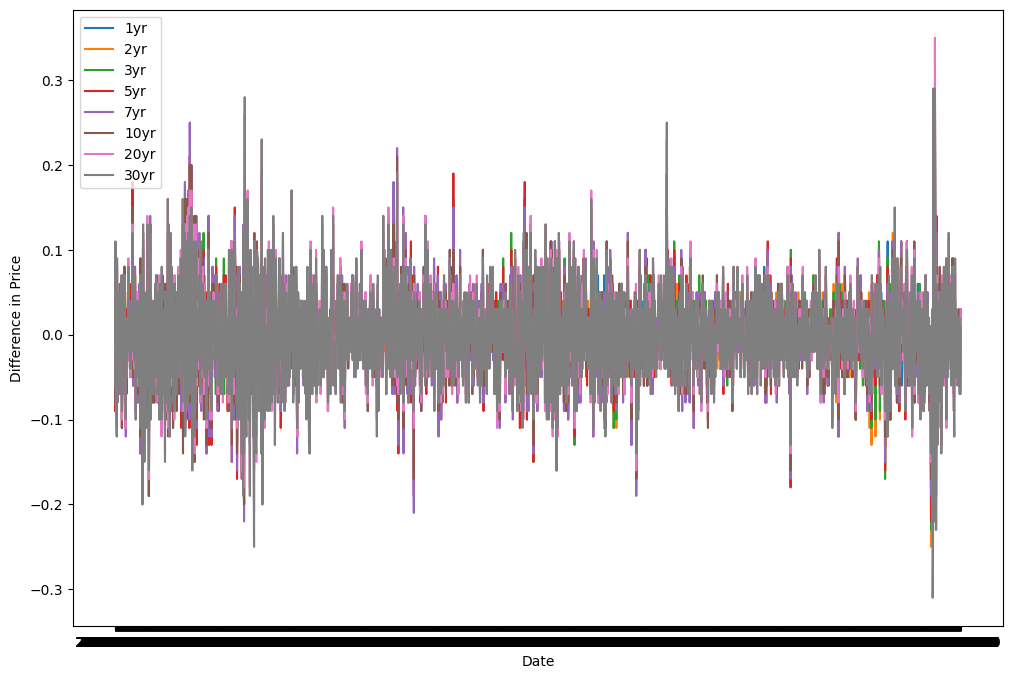

In [18]:
plt.figure(figsize=(12, 8))
for col in df.columns:
    plt.plot(df_diff.index, df_diff[col], label=col)
plt.xlabel("Date")
plt.ylabel('Difference in Price')
plt.legend()
plt.show()

In [14]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[6.344699   0.99615825 0.42508877 0.13440286 0.05352547 0.02113283
 0.01513867 0.01289599]


In [1]:
import numpy as np

mu = 0 
sigma = 1
n_samples = 1000000

normal_samples = np.random.normal(mu, sigma, n_samples)


p = 0.5      
bernoulli_samples = np.where(np.random.binomial(1, p, n_samples) == 1, 1, -1)


expected_val_lhs = (np.e * np.ones(n_samples)) ** (1j*((np.e * np.ones(n_samples)) ** normal_samples) * bernoulli_samples + bernoulli_samples) 
# E[e^(i*t*e^X*Y + s*Y)]; s,t = 1
expected_val_lhs = 1/n_samples * expected_val_lhs.sum()

# E[e^(i*t*e^X*y)] * E[e^(sY)]; s,t = 1 with same samples
expected_val_rhs_1 = (np.e * np.ones(n_samples)) ** (1j * (np.e * np.ones(n_samples) ** (normal_samples)) * bernoulli_samples)
expected_val_rhs_2 = (np.e * np.ones(n_samples)) ** bernoulli_samples
expected_val_rhs = (1/n_samples) * (expected_val_rhs_1 * expected_val_rhs_2).sum()

print(f'Expected Value Left Hand Side: {expected_val_lhs}')
print(f'Expected Value Right Hand Side: {expected_val_rhs}')

Expected Value Left Hand Side: (0.5256935628709561+0.59592792970382j)
Expected Value Right Hand Side: (-1.4065403632440152+0.48255036043073146j)
